# Alucar - Analisando as vendas

In [37]:
# bibliotecas

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

%matplotlib inline

In [13]:
print(sns.__version__)

0.12.2


In [2]:
# importar a base de dados

alucar = pd.read_csv('dados/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
alucar.shape

(24, 2)

In [5]:
alucar.isna().sum().sum()

0

In [6]:
alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [7]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes


In [8]:
alucar_tratada = alucar.copy()
alucar_tratada['mes'] = pd.to_datetime(alucar_tratada['mes'])

alucar_tratada.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<Axes: xlabel='mes', ylabel='vendas'>

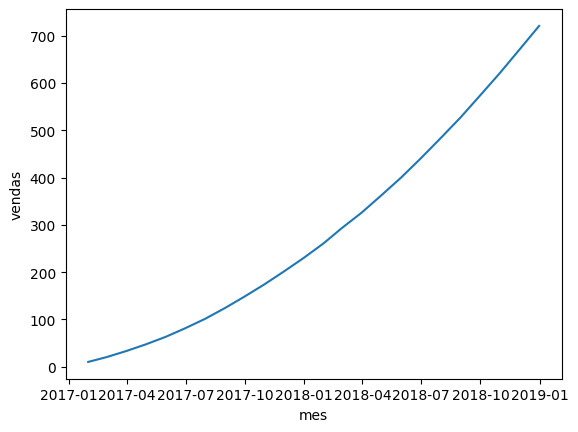

In [14]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar_tratada)

# Melhorando o gráfico

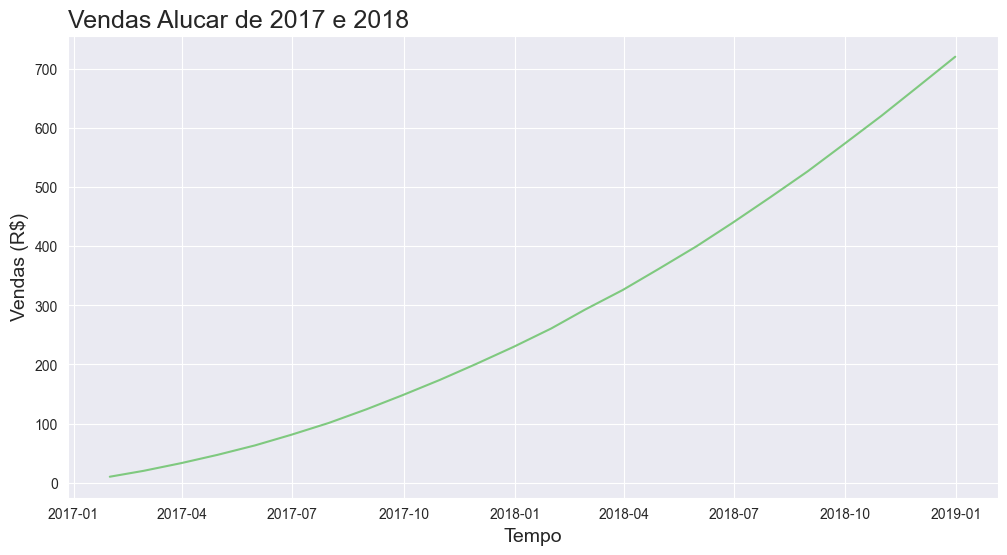

In [23]:
sns.set_palette("Accent")
sns.set_style('darkgrid')

ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar_tratada)

ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)

ax = ax

# Decompondo as vendas

In [31]:
alucar_decomposicao = alucar_tratada.copy()
alucar_decomposicao['aumento'] = alucar_decomposicao['vendas'].diff()
alucar_decomposicao['aceleracao'] = alucar_decomposicao['aumento'].diff()

alucar_decomposicao.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


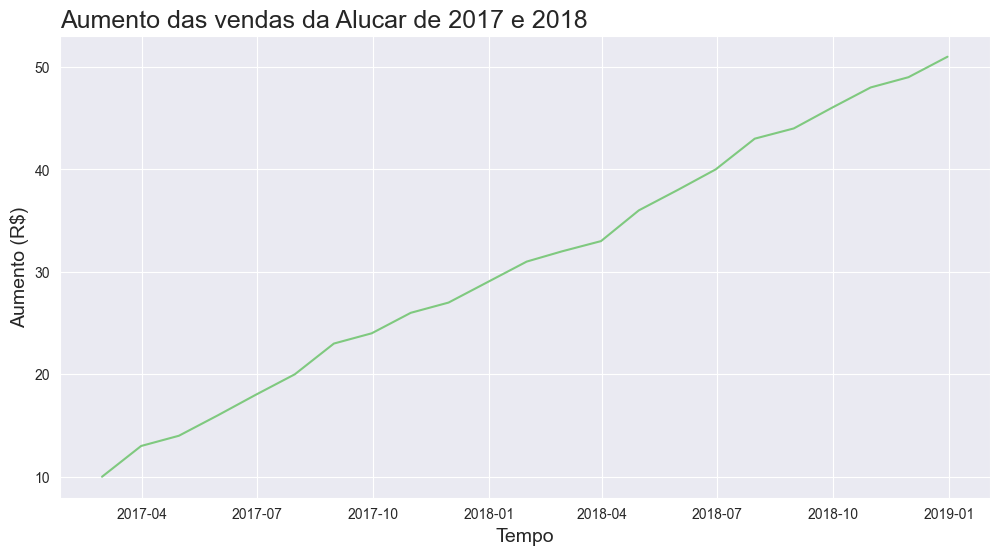

In [28]:
sns.set_palette("Accent")
sns.set_style('darkgrid')

ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar_decomposicao)

ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento (R$)', fontsize = 14)

ax = ax

In [29]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette("Accent")
    sns.set_style('darkgrid')

    ax = sns.lineplot(x = x, y = y, data = dataset)

    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)

    ax = ax

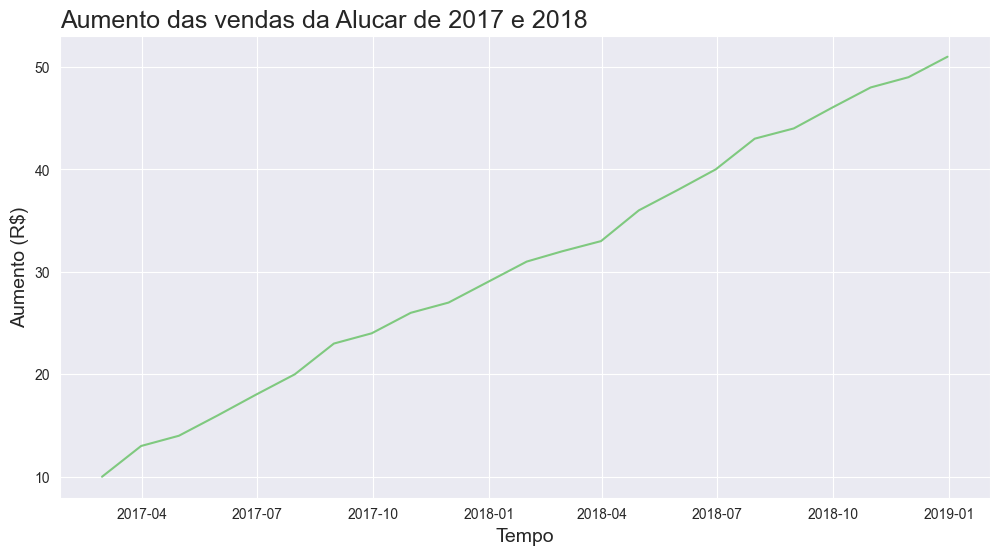

In [30]:
plotar('Aumento das vendas da Alucar de 2017 e 2018',
       'Tempo',
       'Aumento (R$)',
       x = 'mes',
       y = 'aumento',
       dataset = alucar_decomposicao)

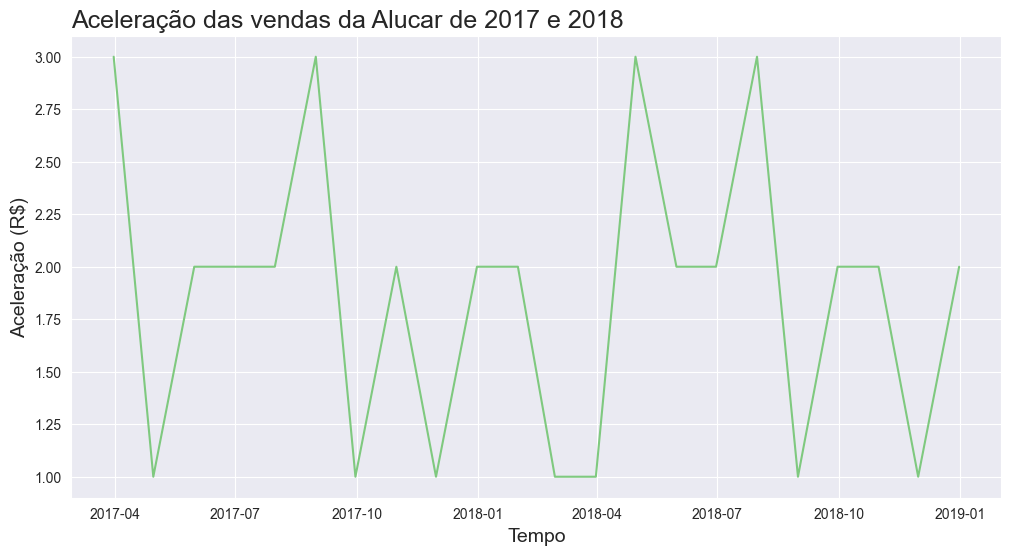

In [32]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018',
       'Tempo',
       'Aceleração (R$)',
       x = 'mes',
       y = 'aceleracao',
       dataset = alucar_decomposicao)

# Observação e tendência

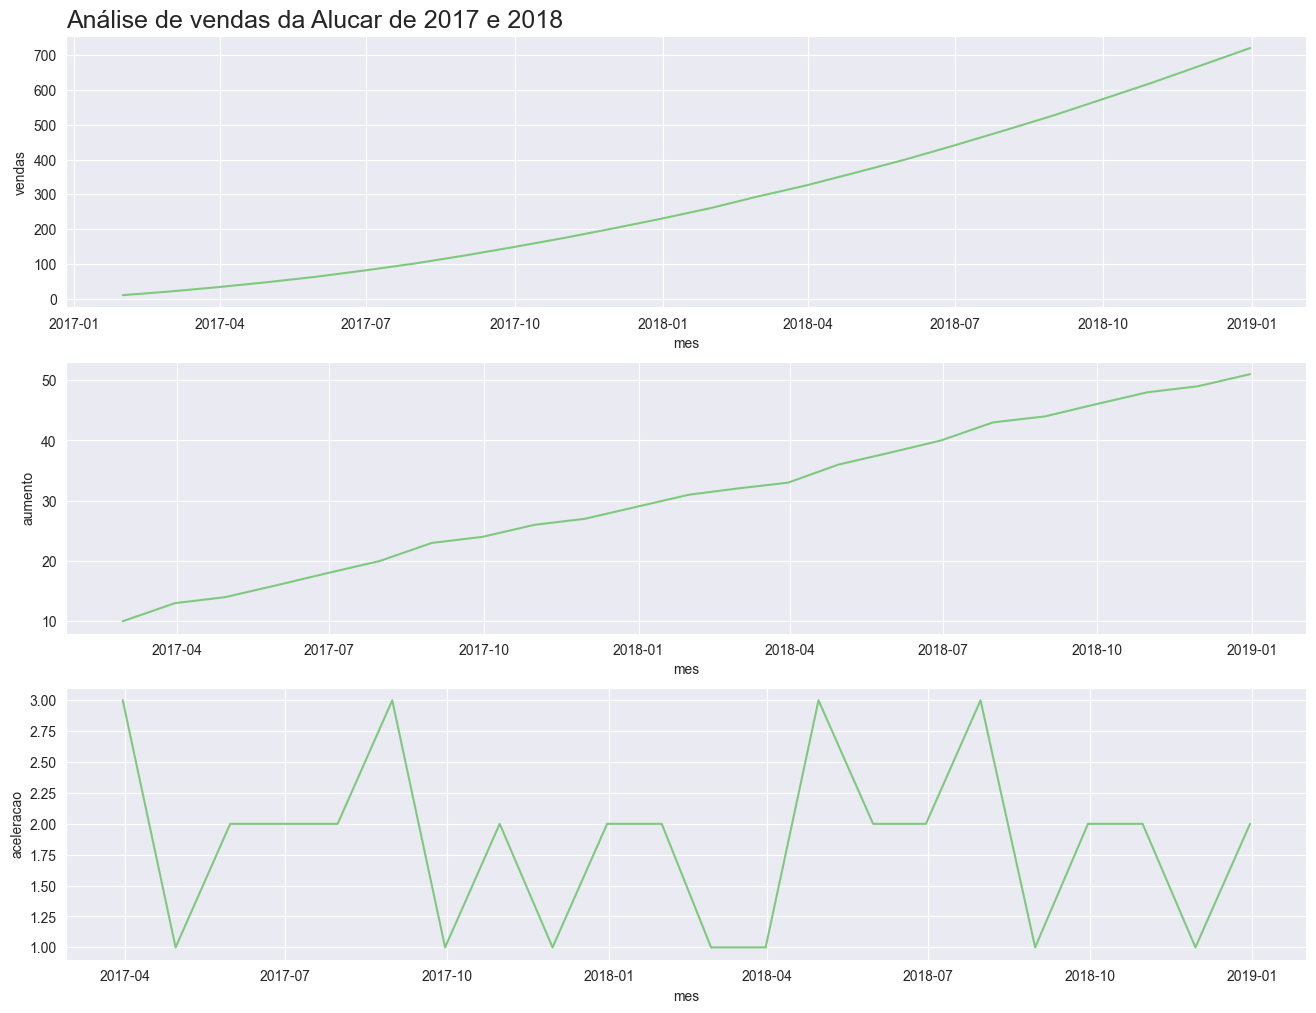

In [34]:
plt.figure(figsize = (16, 12))

ax = plt.subplot(3,1,1)
ax.set_title("Análise de vendas da Alucar de 2017 e 2018", fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar_decomposicao)

plt.subplot(3,1,2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar_decomposicao)

plt.subplot(3,1,3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar_decomposicao)

ax = ax

In [35]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16, 12))

    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)

    plt.subplot(3,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)

    plt.subplot(3,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)

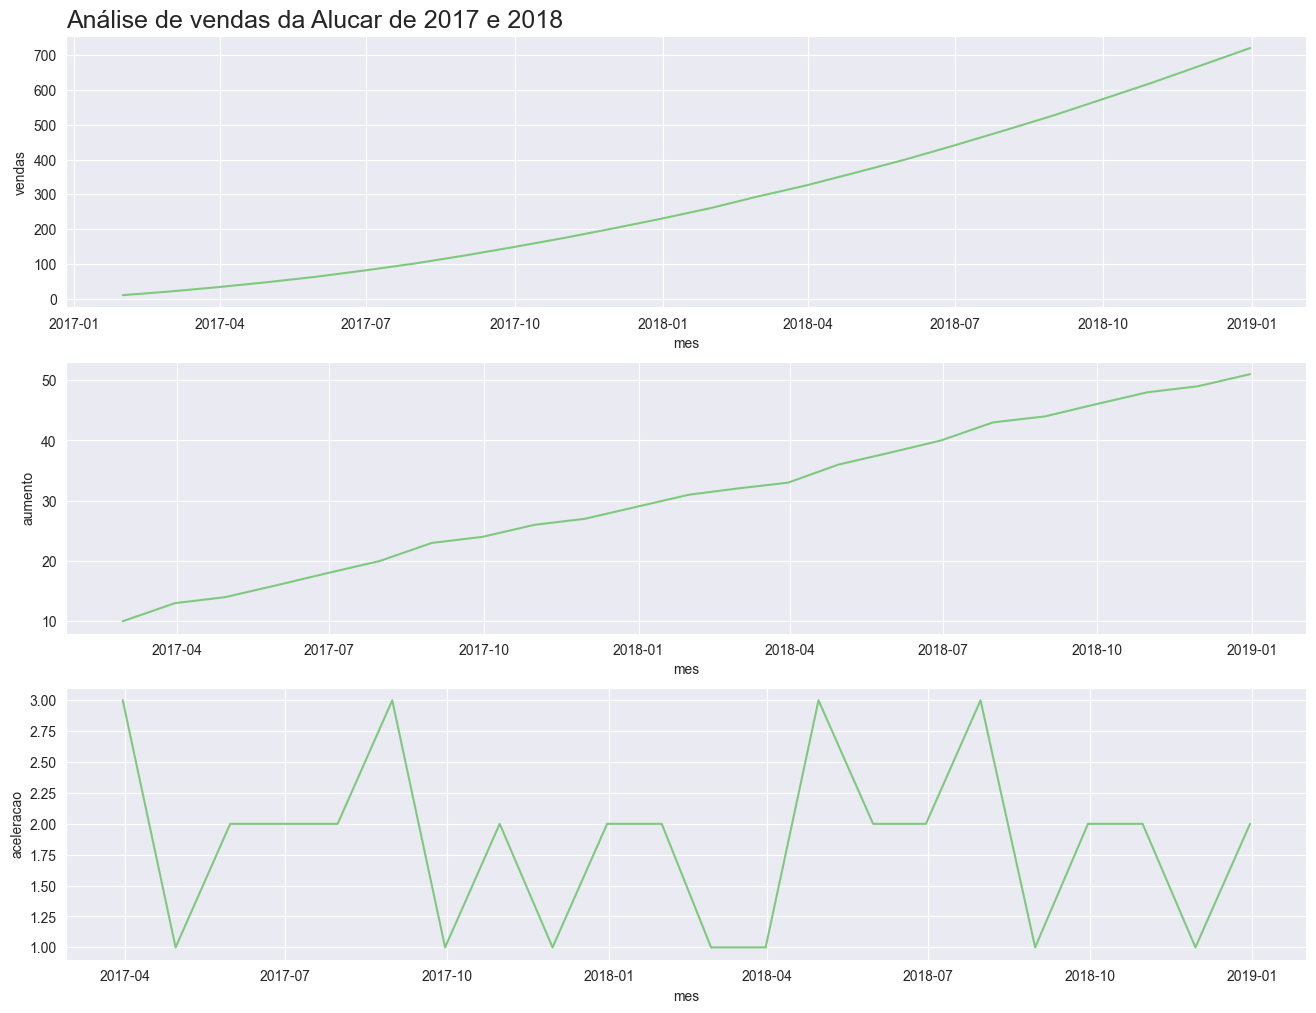

In [36]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar_decomposicao, "Análise de vendas da Alucar de 2017 e 2018")

# Autocorrelação

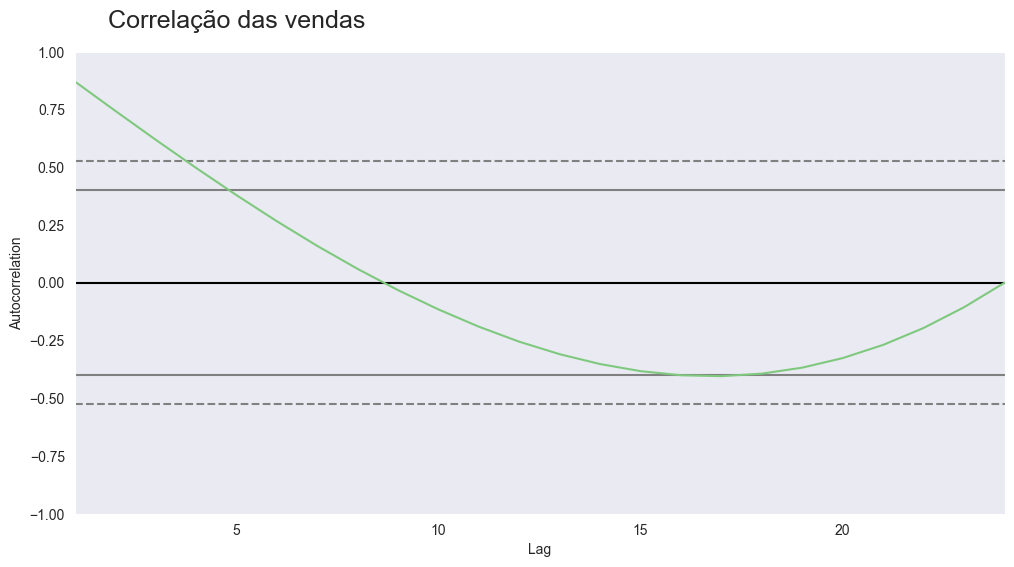

In [42]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das vendas', fontsize = 18, x = 0.26, y = 0.95)

autocorrelation_plot(alucar['vendas'])
ax = ax

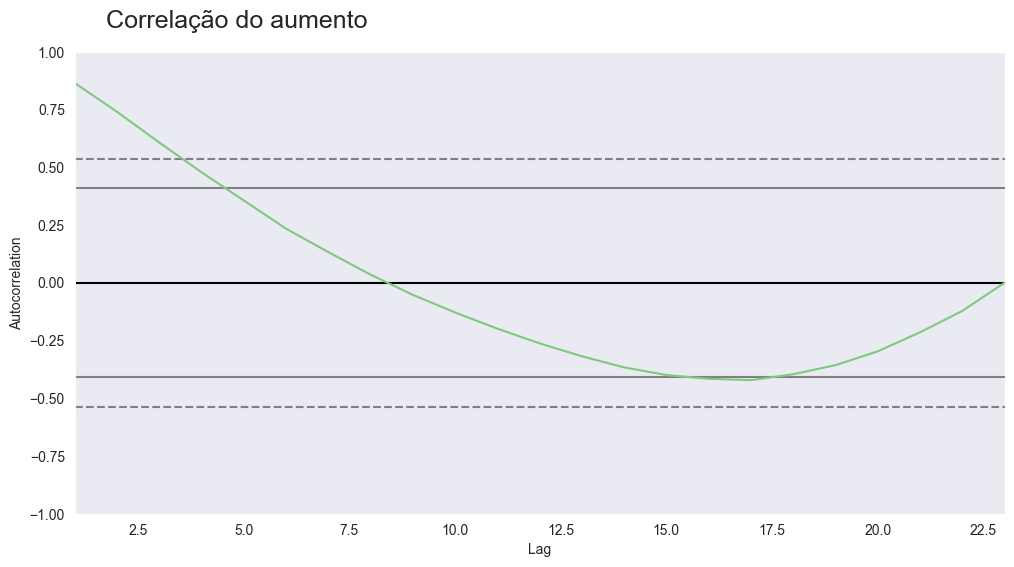

In [43]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do aumento', fontsize = 18, x = 0.26, y = 0.95)

autocorrelation_plot(alucar_decomposicao['aumento'][1:])
ax = ax

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

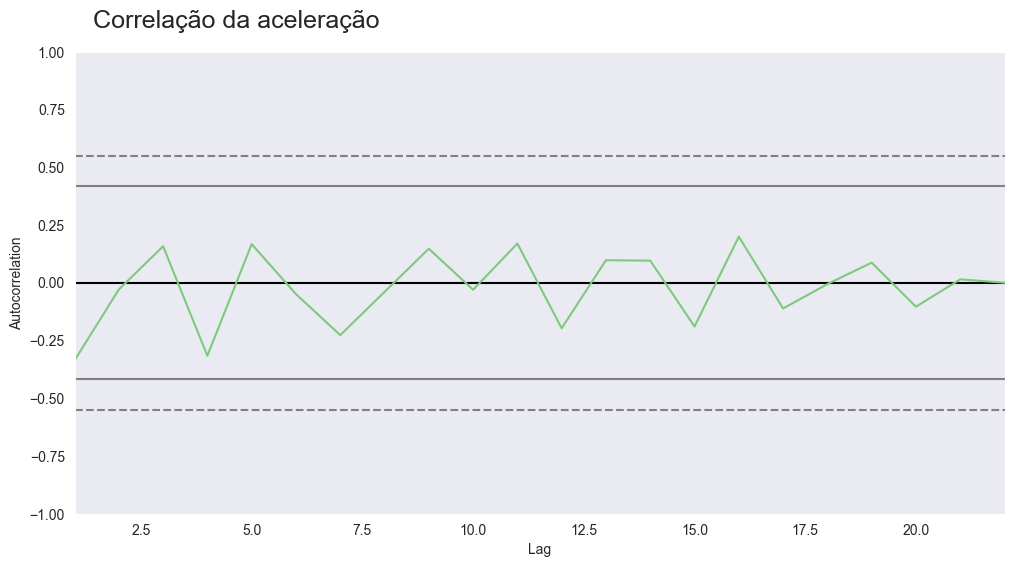

In [45]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da aceleração', fontsize = 18, x = 0.26, y = 0.95)

autocorrelation_plot(alucar_decomposicao['aceleracao'][2:])